In [55]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
import matplotlib.pyplot as plt

In [56]:
# pull in website's source code with url
url = 'https://ceoworld.biz/2021/06/07/these-are-the-worlds-richest-actors-for-2021/'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [57]:
# extract source code for the table
table = soup.find('table')
# print(table)

In [58]:
# extract table titles as column names
titles = table.find_all('thead')
column_names = []

for title in titles:
    columns = title.find_all('th', attrs = {'class': re.compile('column-')})
    for column in columns:
        column_names.append(column.get_text())
        
print(column_names)

['Rank', 'Name', 'Net Worth']


In [59]:
# extract actors and their net worth as column rows
data = table.find('tbody')
rows = data.find_all('tr')
output = []

for row in rows:
    infos = [info.get_text() for info in row.find_all('td')]
    output.append(infos)
    
print(output)
    

[['1', 'Tyler Perry', '$1 billion'], ['2', 'Jerry Seinfield', '$950 million'], ['3', 'Shahrukh Khan', '$600 million'], ['4', 'Tom Cruise', '$580 million'], ['5', 'George Clooney', '$500 million '], ['6', 'Robert De Niro', '$500 million'], ['7', 'The Olsen twins', '$500 million'], ['8', 'Amitabh Bachchan', '$455 million'], ['9', 'Mel Gibson', '$425 million'], ['10', 'Adam Sandler', '420 million'], ['11', 'Sylvester Stallone', '$400 million'], ['12', 'Jack Nicholson ', '$400 million'], ['13', 'Arnold Schwarzenegger', '$400 million'], ['14', 'Dwayne Johnson', '$400 million'], ['15', 'Clint Eastwood', '$375 million'], ['16', 'Salman Khan', '$360 million'], ['17', 'Keanu reeves', '$360 million'], ['18', 'Jackie Chan', '$350 million'], ['19', 'Will Smith', '$350 million'], ['20', 'Tom Hanks', '$350 million'], ['21', 'Jessica Alba', '$350 million'], ['22', 'Victoria Principal', '$350 million'], ['23', 'Michael Douglas', '$350 million'], ['24', 'Robert Downey Jr.', '$300 million'], ['25', 'Bra

In [60]:
# create dataframe with column names and output
rich_actors = pd.DataFrame(output, columns=column_names)
rich_actors.head()

,Rank,Name,Net Worth
0,1,Tyler Perry,$1 billion
1,2,Jerry Seinfield,$950 million
2,3,Shahrukh Khan,$600 million
3,4,Tom Cruise,$580 million
4,5,George Clooney,$500 million


In [61]:
# set column Rank as index
rich_actors = rich_actors.set_index('Rank')
rich_actors.head()

,Name,Net Worth
Rank,,
1,Tyler Perry,$1 billion
2,Jerry Seinfield,$950 million
3,Shahrukh Khan,$600 million
4,Tom Cruise,$580 million
5,George Clooney,$500 million


In [62]:
# convert column Net Worth into integer
rich_actors['Net Worth'] = rich_actors['Net Worth'].str.replace('[\$]', '', regex=True)
rich_actors['Net Worth']

new_net_worth = []
for i in rich_actors['Net Worth']:
    if 'billion' in i:
        new_net_worth.append(i.replace(' billion', '0'* 9))
    else:
        new_net_worth.append(i.replace(' million', '0'* 6))
    
print(new_net_worth)

rich_actors['Net Worth'] = new_net_worth

rich_actors['Net Worth'] = rich_actors['Net Worth'].astype('int')

['1000000000', '950000000', '600000000', '580000000', '500000000 ', '500000000', '500000000', '455000000', '425000000', '420000000', '400000000', '400000000', '400000000', '400000000', '375000000', '360000000', '360000000', '350000000', '350000000', '350000000', '350000000', '350000000', '350000000', '300000000', '300000000', '300000000', '300000000', '300000000', '260000000', '255000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '250000000', '225000000']


In [63]:
rich_actors.head()

,Name,Net Worth
Rank,,
1,Tyler Perry,1000000000
2,Jerry Seinfield,950000000
3,Shahrukh Khan,600000000
4,Tom Cruise,580000000
5,George Clooney,500000000


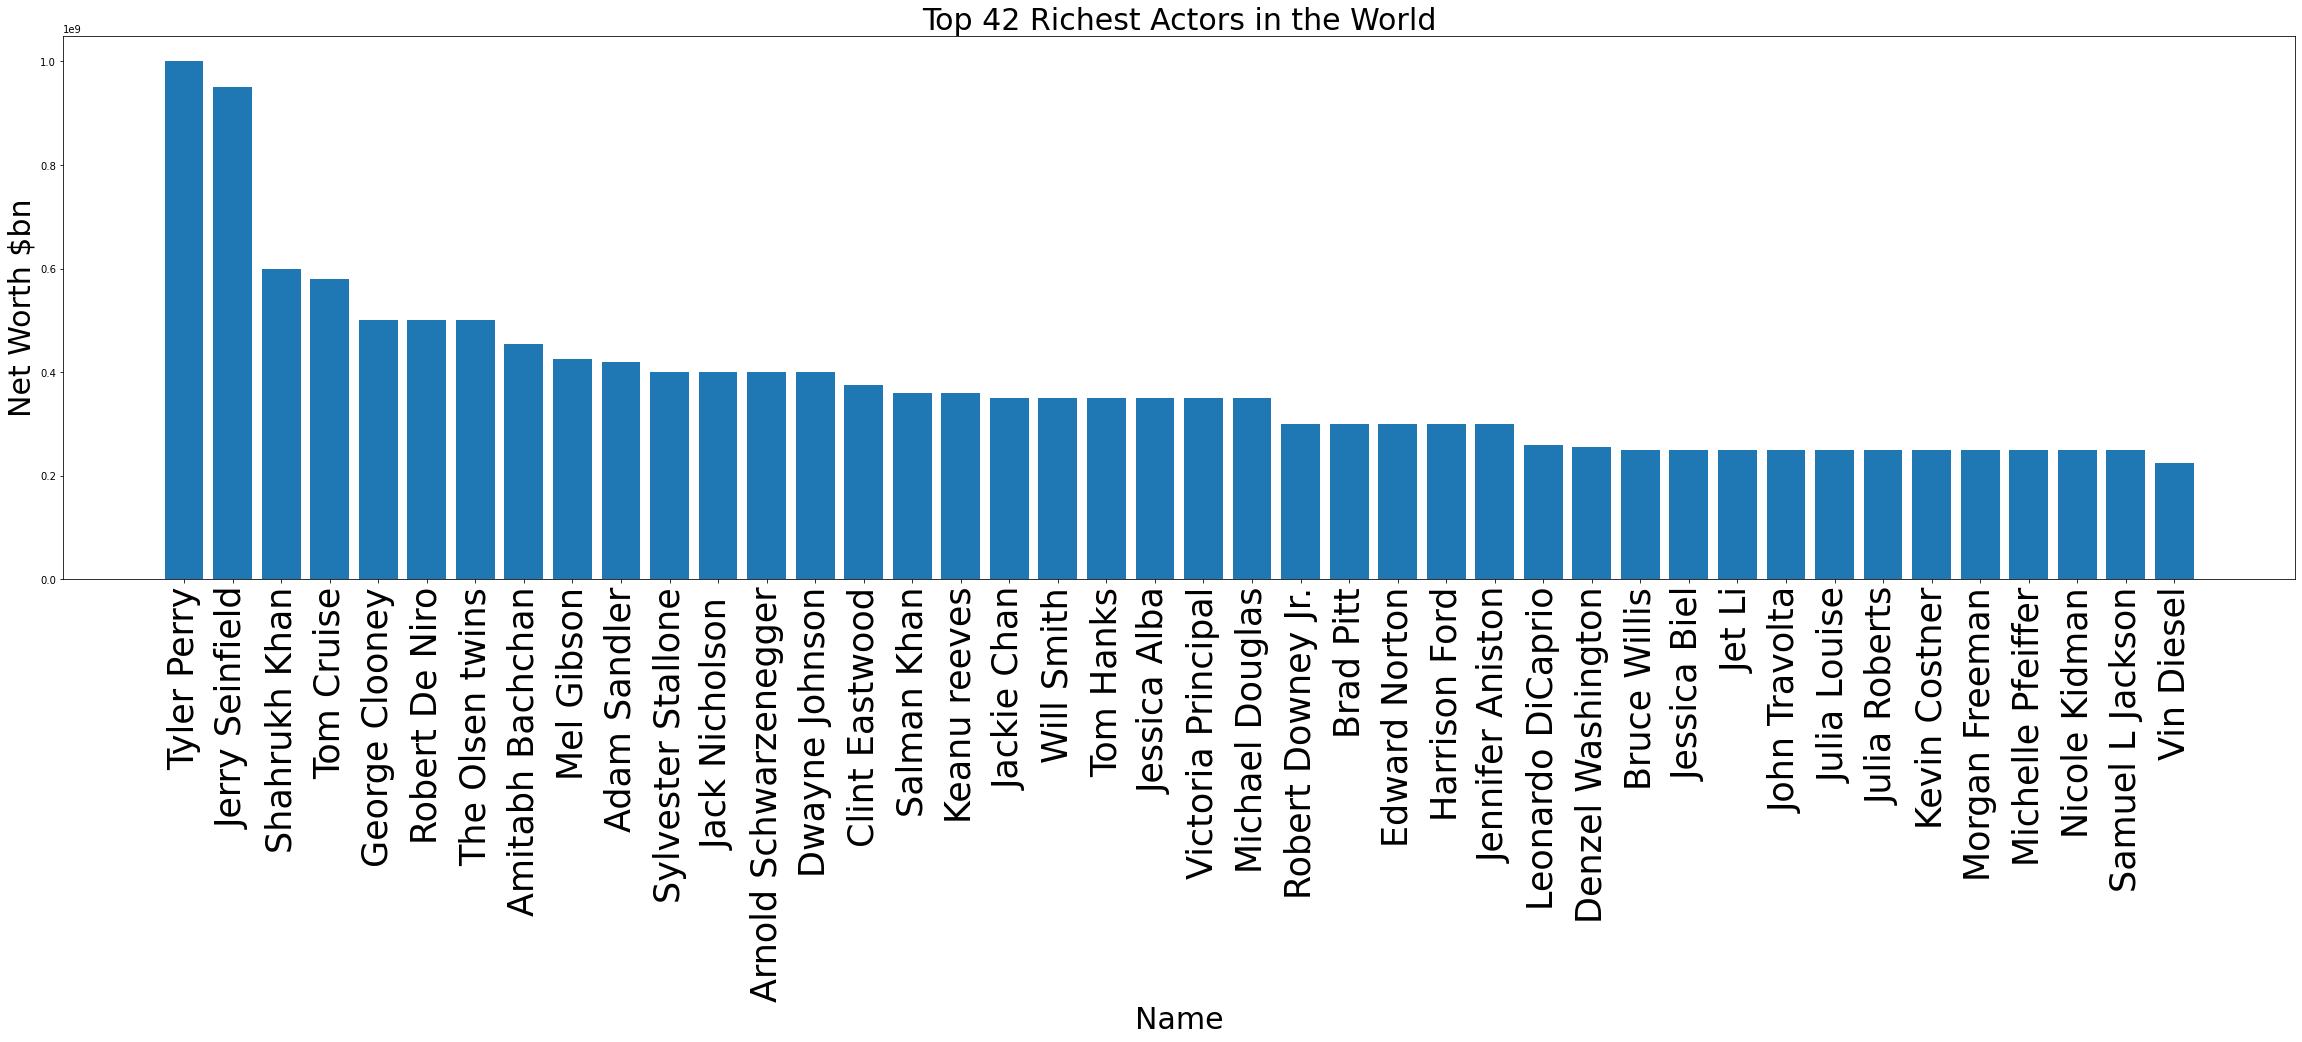

In [72]:
plt.figure(figsize=(40, 10))
plt.bar(range(len(rich_actors)), rich_actors['Net Worth'])
plt.xticks(range(len(rich_actors)), rich_actors['Name'], rotation=90, fontsize=35)
plt.title('Top 42 Richest Actors in the World', fontsize=30)
plt.xlabel('Name', fontsize=30)
plt.ylabel('Net Worth $bn', fontsize=30)
plt.show()